In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
import sys
import PIL
import scipy.stats as stats
sys.path.insert(0, '/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/')

In [16]:
path = r'/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/Results_FINAL_FINAL_agar_analysis_summary/'
base = '0_all_data_summary'

saveFileLvsNreversal = base+r'_L_or_T_vs_nReversal.png'
saveFileLvsNreversal1 = base+r'_L_or_T_vs_nReversal.tif'

saveFileObsExp = base+r'_L_or_T_vs_nReversal.png'
saveFileObsExp1 = base+r'_L_or_T_vs_nReversal.tif'

df = pd.read_csv(path+base+".csv",sep="\t")

df_values = df.iloc[:, 1:]
df_ids = df.iloc[:, 1]
summaryStats = df_values.to_numpy()
summaryStats[:,1]

len(summaryStats[:,1])

65

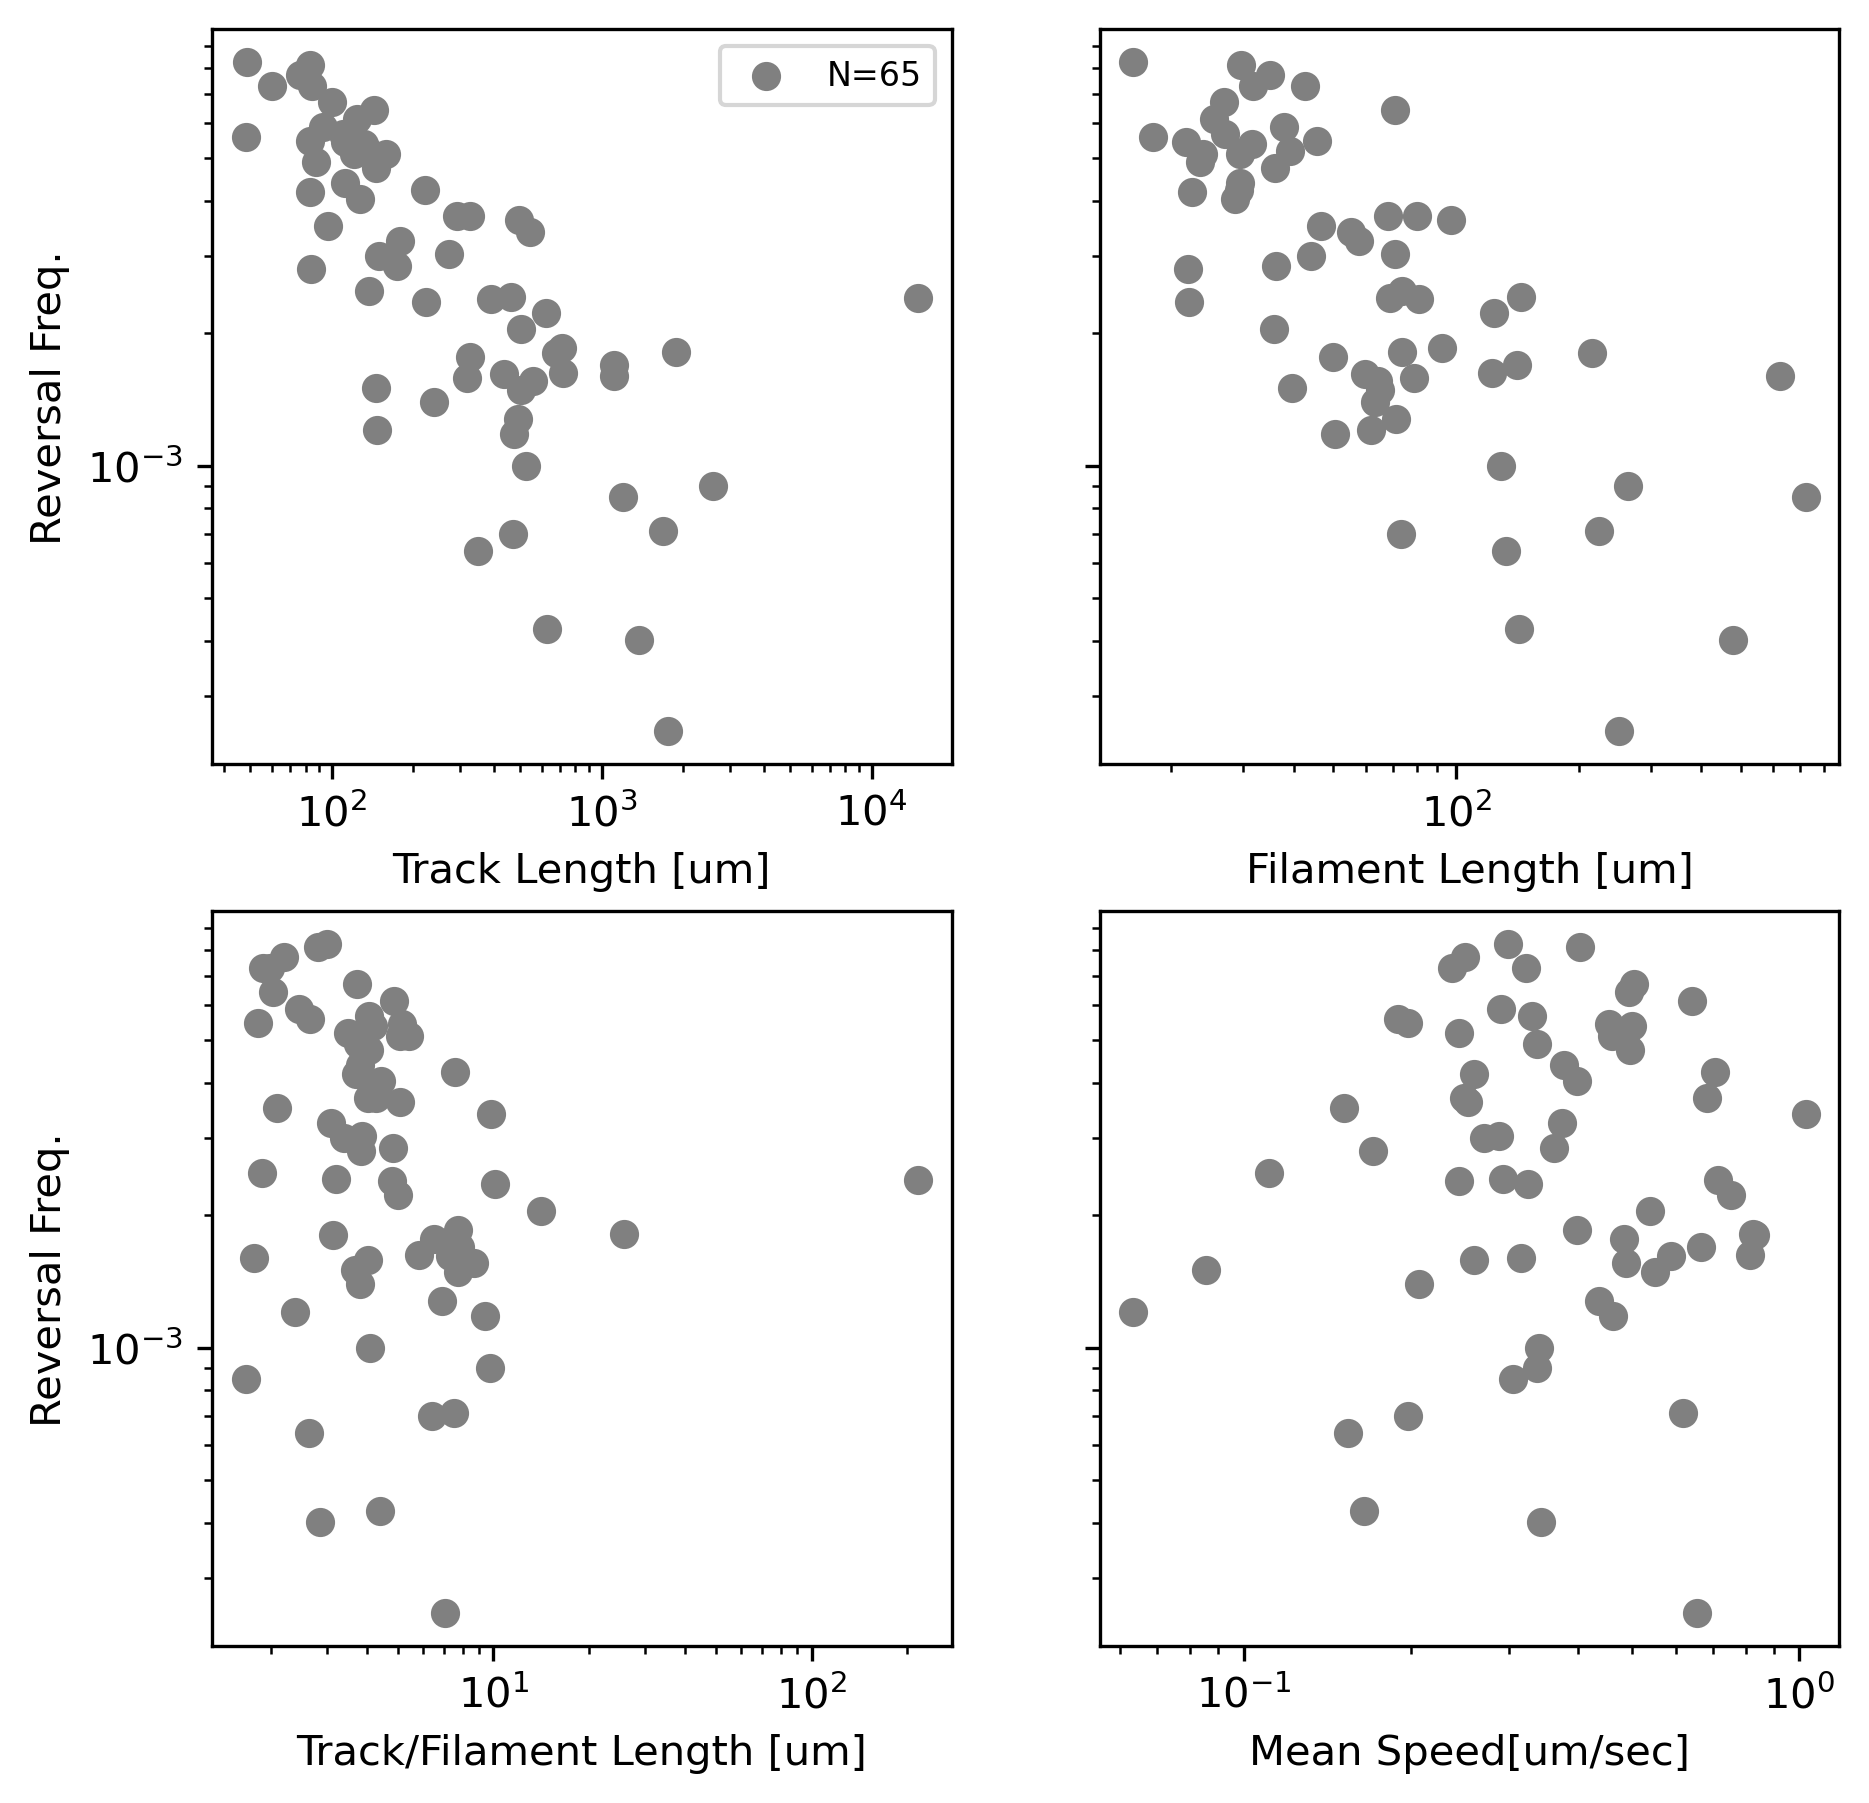

In [22]:
########
## PLOT REVERSAL FREQ AGAINST SPEED AND LENGTHS
######

#column 15: observation duration
#cloumn 5: Nreversals observed
#column 3: Track length [um]
#column 2: Filament length [um]

revFreq = (summaryStats[:,5]/summaryStats[:,15])

fig, ax = plt.subplots(2,2, figsize=(7,7), dpi=300, sharey=True)

ax[0,0].scatter(summaryStats[:,3],revFreq,color='gray',label = 'N=65')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Track Length [um]')
ax[0,0].set_ylabel('Reversal Freq.')
ax[0,0].legend(loc="upper right",fontsize=8)

ax[0,1].scatter(summaryStats[:,2],revFreq,color='gray')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Filament Length [um]')

ax[1,0].scatter(summaryStats[:,3]/summaryStats[:,2],revFreq,color='gray')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('Track/Filament Length [um]')
ax[1,0].set_ylabel('Reversal Freq.')

ax[1,1].scatter(summaryStats[:,7],revFreq,color='gray')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Mean Speed[um/sec]')

fig.savefig(saveFileLvsNreversal)
fig.savefig(saveFileLvsNreversal1)
plt.show()
plt.close(fig)

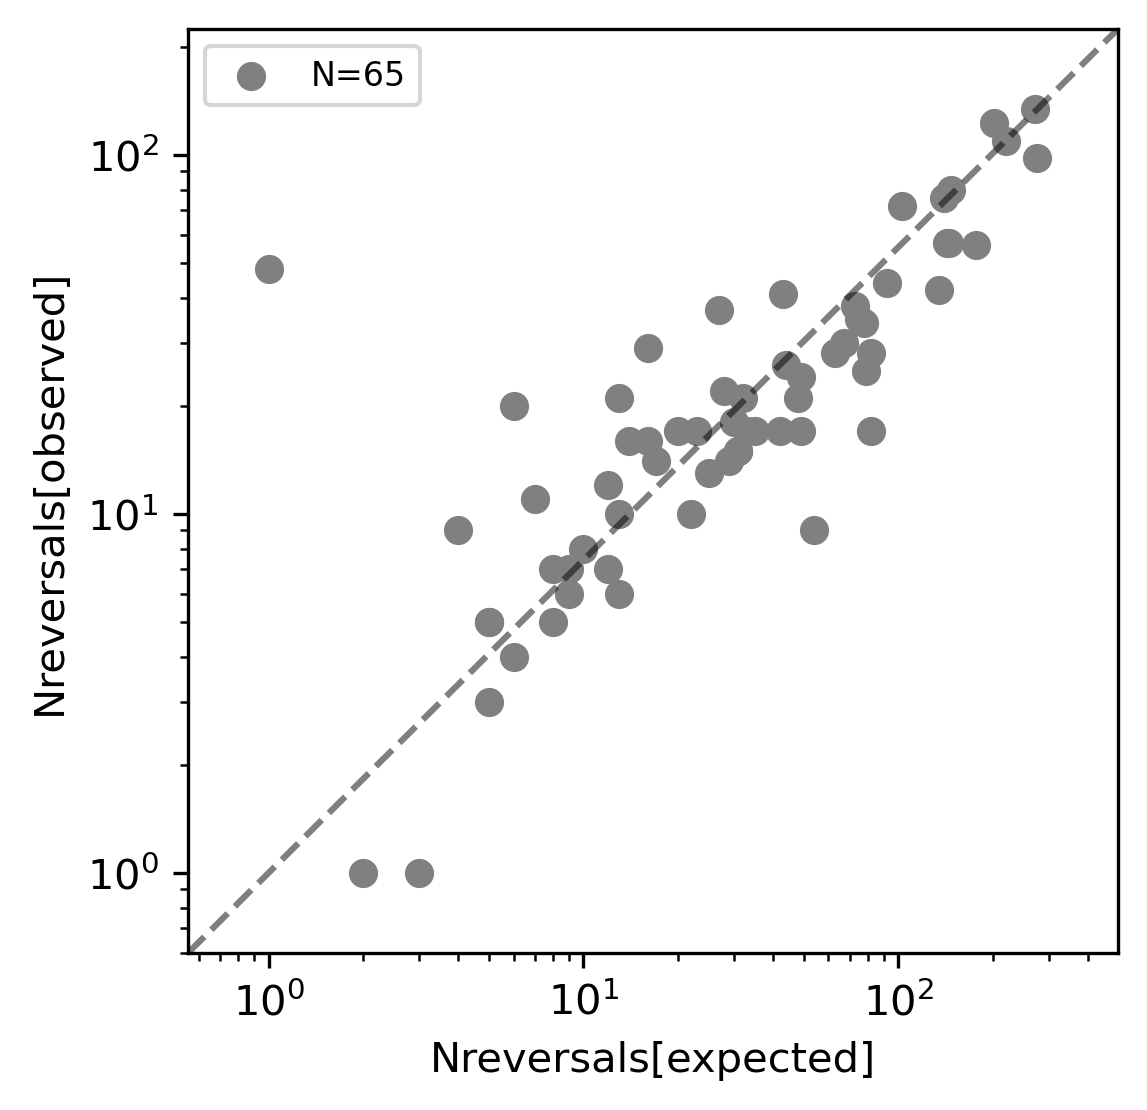

In [24]:
########
## PLOT ACTUAL REVERSAL AGAINST EXPECTED REVERSAL - ALL CASES
######

#get Nreversal, expected and actual
Nexpected_subset = np.copy(summaryStats[:,4])
Nactual_subset = np.copy(summaryStats[:,5])

#re-calculate Nexpected
for i in range(0,len(Nexpected_subset)):
    if Nexpected_subset[i] != np.nan:
        D_to_travel = summaryStats[i,3] - summaryStats[i,2]
        speedToUse = np.min([summaryStats[i,6],1.0])
        t_to_travel = D_to_travel / speedToUse
        obsDuration = summaryStats[i,15]
        Nexpected_subset[i] = np.round(obsDuration / t_to_travel)

fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=300)
ax.scatter(Nexpected_subset,Nactual_subset,color='gray',label = 'N=65')
#ax.scatter(summaryStats[:,4],summaryStats[:,5],color='gray')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Nreversals[expected]')
ax.set_ylabel('Nreversals[observed]')
ax.axline([ax.get_xlim()[0], ax.get_ylim()[0]], [ax.get_xlim()[1], ax.get_ylim()[1]],color='k',alpha=0.5,linestyle="--")
ax.legend(loc="upper left",fontsize=8)

fig.savefig(saveFileObsExp)
fig.savefig(saveFileObsExp1)
plt.show()
plt.close(fig)

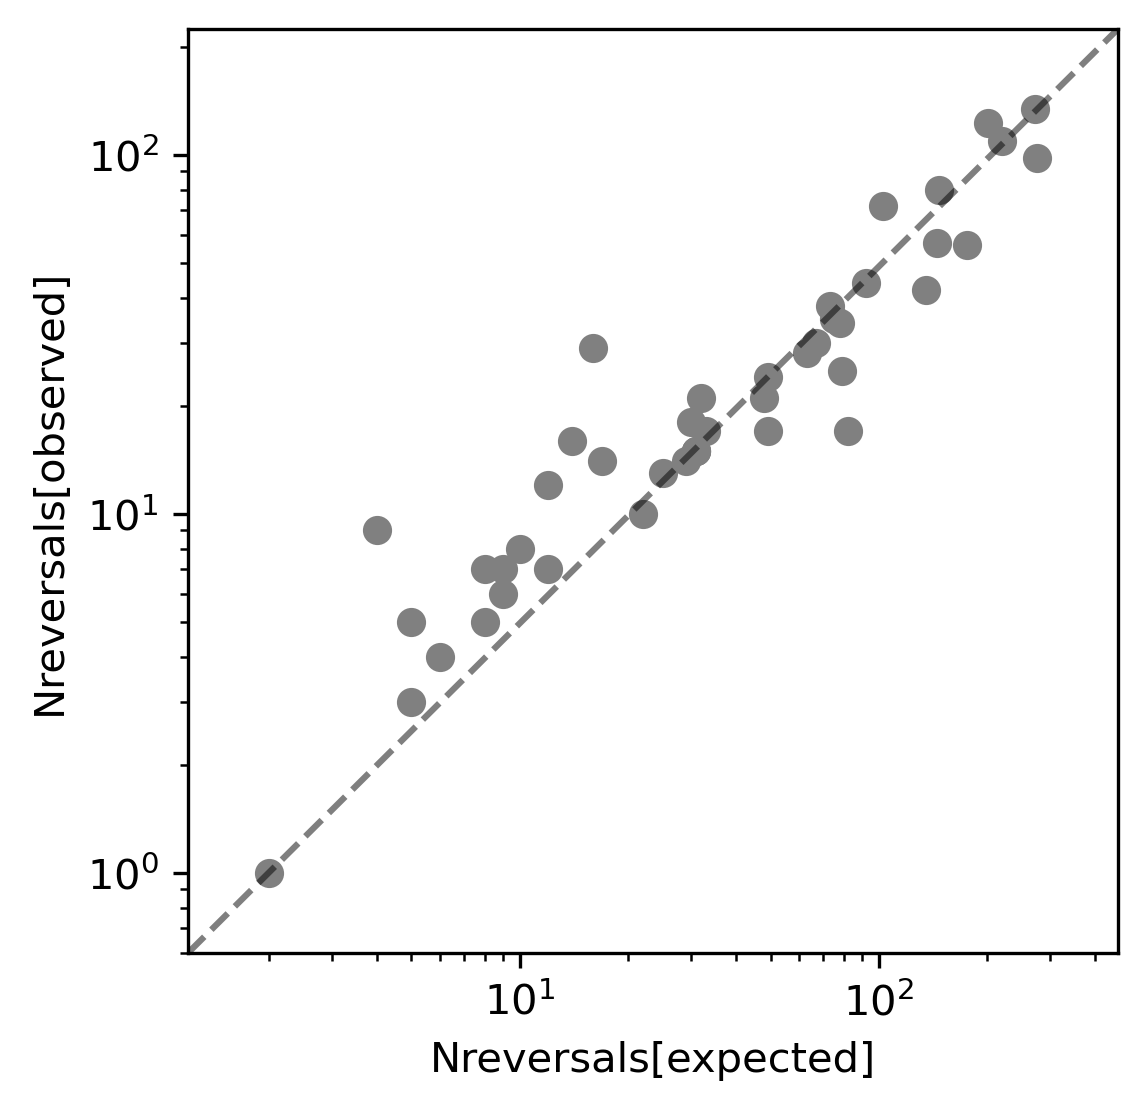

In [20]:
########
## PLOT ACTUAL REVERSAL AGAINST EXPECTED REVERSAL - CASES WITH UNCLEAR TRACKS REMOVED
######

#get Nreversal, expected and actual
Nexpected_subset = np.copy(summaryStats[:,4])
Nactual_subset = np.copy(summaryStats[:,5])

#set those datasets to be excluded as nans - e.g. those cases, where we are unsure about the expected reversal calculation
Nexpected_subset[np.where(summaryStats[:,16]==0)]=np.nan
Nexpected_subset[np.where(summaryStats[:,16]==2)]=np.nan
Nactual_subset[np.where(summaryStats[:,16]==0)]=np.nan
Nactual_subset[np.where(summaryStats[:,16]==2)]=np.nan

#re-calculate Nexpected
for i in range(0,len(Nexpected_subset)):
    if Nexpected_subset[i] != np.nan:
        D_to_travel = summaryStats[i,3] - summaryStats[i,2]
        speedToUse = np.min([summaryStats[i,6],1.0])
        t_to_travel = D_to_travel / speedToUse
        obsDuration = summaryStats[i,15]
        Nexpected_subset[i] = np.round(obsDuration / t_to_travel)

fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=300)
ax.scatter(Nexpected_subset,Nactual_subset,color='gray',)
#ax.scatter(summaryStats[:,4],summaryStats[:,5],color='gray')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Nreversals[expected]')
ax.set_ylabel('Nreversals[observed]')
ax.axline([ax.get_xlim()[0], ax.get_ylim()[0]], [ax.get_xlim()[1], ax.get_ylim()[1]],color='k',alpha=0.5,linestyle="--")

#fig.savefig(saveFileObsExp)
#fig.savefig(saveFileObsExp1)
plt.show()
plt.close(fig)

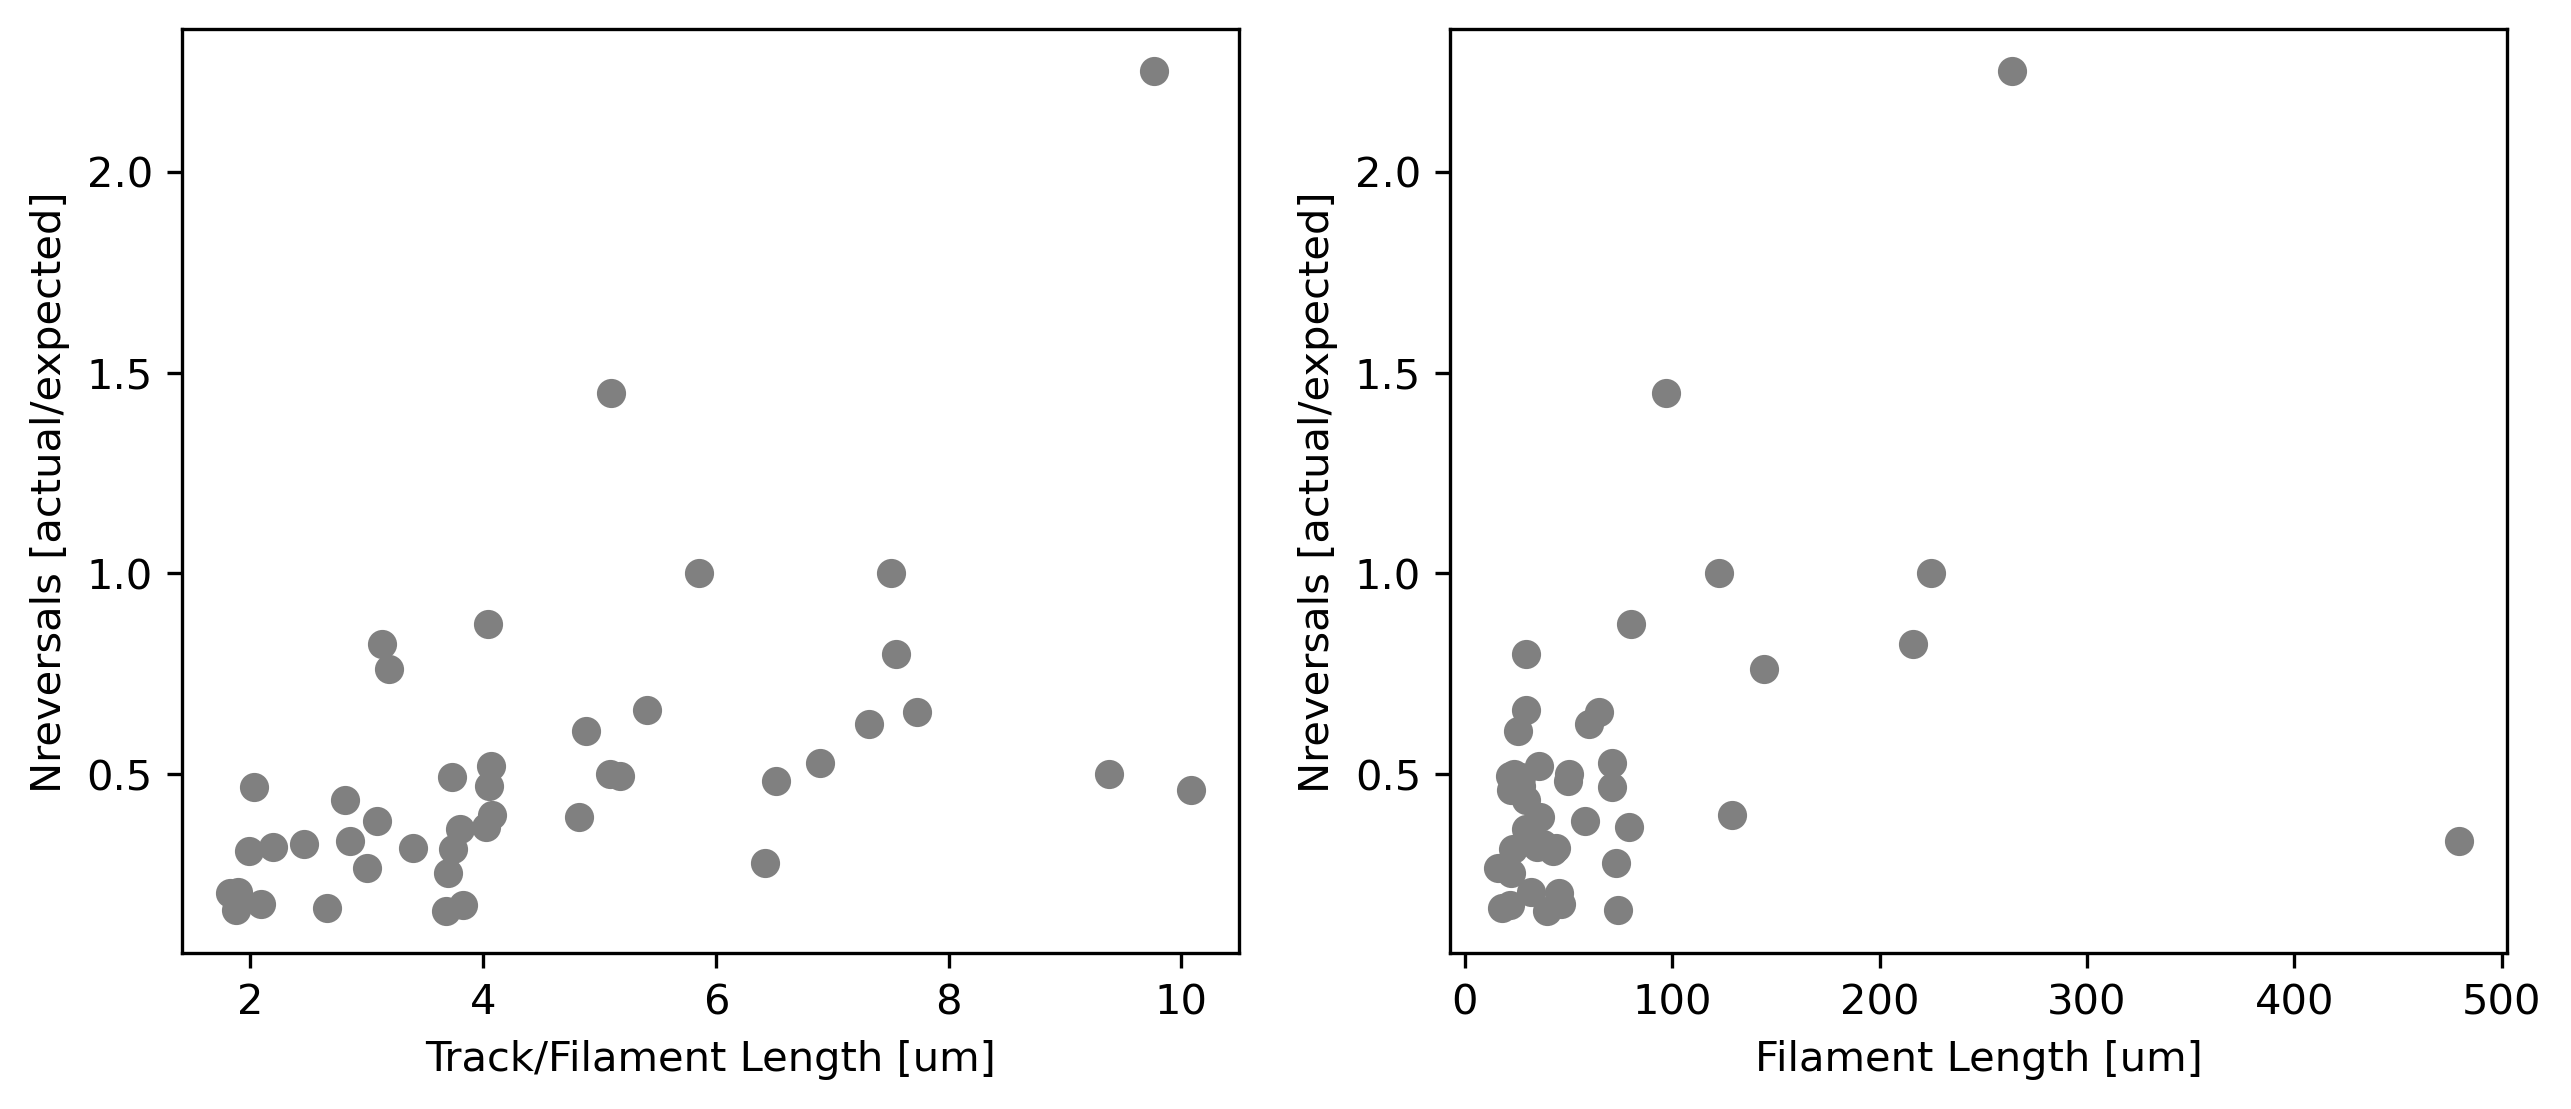

In [5]:

########
## PLOT RATIO OF ACTUAL/EXPECTED REVERSAL AGAINST LENGTH
######

#get Nreversal, expected and actual
Nexpected_subset = np.copy(summaryStats[:,4])
Nactual_subset = np.copy(summaryStats[:,5])

#set those datasets to be excluded as nans - e.g. those cases, where we are unsure about the expected reversal calculation
Nexpected_subset[np.where(summaryStats[:,16]==0)]=np.nan
Nactual_subset[np.where(summaryStats[:,16]==0)]=np.nan
Nactual_subset[np.where(summaryStats[:,16]==2)]=np.nan
Nexpected_subset[np.where(summaryStats[:,16]==2)]=np.nan

#re-calculate Nexpected
for i in range(0,len(Nexpected_subset)):
    if Nexpected_subset[i] != np.nan:
        D_to_travel = summaryStats[i,3] - summaryStats[i,2]     #Distance to travel from track end points
        #speedToUse = np.max([summaryStats[i,6],1.0])            #speed to use: filament max or 1.0, which is the mean from all filaments
        speedToUse = 1.0                                        #speed to use: 1.0, which is the mean from all filaments
        t_to_travel = D_to_travel / speedToUse                  #time to travel
        obsDuration = summaryStats[i,15]                        #duration of observation
        Nexpected_subset[i] = np.round(obsDuration / t_to_travel)   #N expected reversals

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=300)
ax[0].scatter(summaryStats[:,3]/summaryStats[:,2],Nactual_subset/Nexpected_subset,color='gray')
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlabel('Track/Filament Length [um]')
ax[0].set_ylabel('Nreversals [actual/expected]')

ax[1].scatter(summaryStats[:,2],Nactual_subset/Nexpected_subset,color='gray',label='mean')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].set_xlabel('Filament Length [um]')
ax[1].set_ylabel('Nreversals [actual/expected]')

#fig.savefig(saveFileLvsNreversal)
plt.show()
plt.close(fig)